# Importing modules

In [1]:
import numpy as np
import seaborn as sns 

# Defining transformation matrices

The four matrix transformations that generate each of the parts of the fractal are defined as

$f_{1}$:

$ x_{n+1} = 0 $ <br>
$ y_{n+1} = 0.16 y_n $

$f_2$:

$x_{n+1} = 0.85 x_n + 0.04 y_n$<br>
$y_{n+1} = -0.04 x_n + 0.85 y_n + 1.6$

$f_3$:

$x_{n+1} = 0.2 x_n - 0.26 y_n$<br>
$y_{n+1} = -0.23 x_n + 0.22 y_n + 1.6$

$f_4$:

$x_{n+1} = -0.15 x_n + 0.28 y_n$<br>
$y_{n+1} = -0.26 x_n + 0.24 y_n + 0.44$

In [2]:
#Stem of the fern
st = np.array([[0, 0], [0, 0.16]])

#For small leaflet
sl = np.array([[0.85, 0.04],[-0.04, 0.85]])
sl1 = np.array([[0, 1.6]]).T

#For large leaflet left
lll = np.array([[0.2, -0.26],[0.23,0.22]])
lll1 = np.array([[0, 1.6]]).T

#For large leaflet right
llr = np.array([[-0.15, 0.28],[0.26,0.24]])
llr1 = np.array([[0,0.44]]).T



# Defining transformation functions

Given a set of input coordinates $(x_n, y_n)$, output the coordinates 
$(x_{n+1}, y_{n+1})$ of the required transformation<br> based on the 4 functions defined above

In [3]:
def stem(x,y):
    point = np.array([[x,y]]).T
    new_point = np.matmul(st, point)
    return new_point[0,0], new_point[1,0]

def small_leaflet(x,y):
    point = np.array([[x,y]]).T
    new_point = np.matmul(sl, point) + sl1
    return new_point[0,0], new_point[1,0]

def large_leaflet_left(x,y):
    point = np.array([[x,y]]).T
    new_point = np.matmul(lll, point) + lll1
    return new_point[0,0], new_point[1,0]

def large_leaflet_right(x,y):
    point = np.array([[x,y]]).T
    new_point = np.matmul(llr, point) + llr1
    return new_point[0,0], new_point[1,0]

# Generating coordinates

Based on the transformation function above, generate the coordinates of the plot iteratively <br>
Starting from the initial point $(0,0)$

In [4]:
x = [0]
y = [0]

current = 0

for i in range(1, 50000):
    
    z = np.random.randint(1, 100)
    
    if z == 1:  #Stem appears with 
        cx, cy = stem(x[current], y[current])
    elif z >=2 and z<=86:
        cx, cy = small_leaflet(x[current], y[current])
    elif z>=87 and z<=93:
        cx, cy = large_leaflet_left(x[current], y[current])
    else:
        cx, cy = large_leaflet_right(x[current], y[current])
    x.append(cx)
    y.append(cy)
    current+=1

# Plotting the points

The s parameter in sns.scatterplot() defines the point size

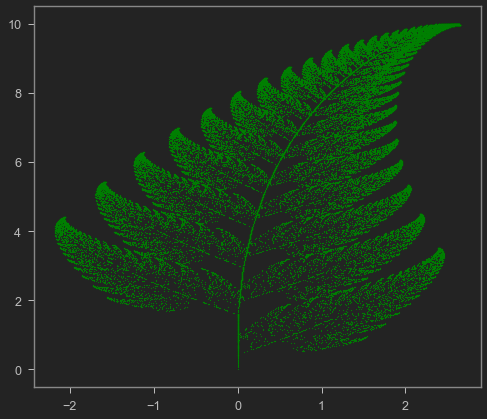

In [5]:
sns.scatterplot(x, y, s=0.2, edgecolor='green');